# Exploratory Data Analysis

### This dataset *movies_full_crew.csv* can be downloaded from Google Drive: https://drive.google.com/drive/folders/1MwFoUvUp2St0Sjq0I9dlNIl_BXkw3fZU

In [2]:
# import the library
%matplotlib inline

import ast
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

In [8]:
df = pd.read_csv('data/movies_full_crew.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.dtypes)

id                               int64
title                           object
budget                           int64
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
crew                            object
keywords                        object
dtype: object


In [17]:
#Setting cast, production_companies, genres and keywords types to a list of dictionaries

df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)
df['crew'] = df['crew'].astype(str)
df['keywords'] = df['keywords'].astype(str)

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x))
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))

#checking results
cell = df['genres'][100]
print('\nGenres cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['production_companies'][100]
print('\nProduction_companies cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['crew'][100]
print('\nCrew cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['keywords'][100]
print('\nKeywords cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))


Genres cell:  <class 'list'> . 
Cell[0]:  {'id': 35, 'name': 'Comedy'} :  <class 'dict'>

Production_companies cell:  <class 'list'> . 
Cell[0]:  {'name': 'Anwar Rasheed Entertainment', 'id': 32732} :  <class 'dict'>

Crew cell:  <class 'list'> . 
Cell[0]:  {'credit_id': '556455d3c3a36851cf004434', 'department': 'Directing', 'gender': 2, 'id': 1171340, 'job': 'Director', 'name': 'Alphonse Putharen', 'profile_path': '/bizV6LQMKMCEAVzeIh5rEOty7av.jpg'} :  <class 'dict'>

Keywords cell:  <class 'list'> . 
Cell[0]:  {'id': 1691, 'name': 'dance'} :  <class 'dict'>


In [18]:
#Extra adjustments for the points discovered later during the process

#replace FRF budget by USD
df.loc[df['id'] == 10656, ['budget']] = 25974
print(df.loc[df['id'] == 10656, ['title']])

#wrong revenue
df.loc[df['id'] == 9838, ['revenue']] = 15057465
print(df.loc[df['id'] == 9838, ['title']])

       title
2138  Subway
                     title
1246  King Solomon's Mines


In [20]:
# Analize release date
# We see that there is a strong tendency of grouth movies produced every year
df['year'] = df['release_date'].dt.year
df['year_month'] = pd.to_datetime(df['release_date']).dt.to_period('M')

In [21]:
#Slicing our data 

df = df[df['year']>=1980]
df.head(5)

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies,crew,keywords,year,year_month,count_crew
0,36523,Felix The Cat: The Movie,9000000,1964253.00,1988-10-01,0.03,3.70,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[{'name': 'Pannónia Filmstúdió', 'id': 48669},...","[{'credit_id': '5587ece192514179f6003987', 'de...","[{'id': 9820, 'name': 'alternate dimension'}, ...",1988,1988-10,163
1,68351,Sankofa,1000000,2691899.00,1993-05-28,0.05,6.90,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Channel Four Films', 'id': 181}, {'...","[{'credit_id': '52fe478ec3a368484e0cd7e1', 'de...","[{'id': 409, 'name': 'africa'}, {'id': 2831, '...",1993,1993-05,2330
2,285908,The Last Breath,3800000,559298.00,1999-03-25,0.07,4.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'name': 'Lions Gate Films', 'id': 35}]","[{'credit_id': '53e55e69c3a3684442000231', 'de...","[{'id': 10714, 'name': 'serial killer'}]",1999,1999-03,830
3,121173,Voracious,11178,34659.00,2012-09-05,0.08,8.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'APT Entertainment', 'id': 8355}, {'...","[{'credit_id': '52fe4a5cc3a368484e14eef3', 'de...","[{'id': 4694, 'name': 'staged death'}, {'id': ...",2012,2012-09,993
5,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'credit_id': '52fe4ad6c3a36847f81e461b', 'de...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n...",2013,2013-03,3037


In [22]:
#
count_fields = lambda df, field: [len(entries) for idx, entries in enumerate(df[field])]
df['count_crew'] = [len(entries) for entries in df['crew']]

df.head(5)

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies,crew,keywords,year,year_month,count_crew
0,36523,Felix The Cat: The Movie,9000000,1964253.00,1988-10-01,0.03,3.70,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[{'name': 'Pannónia Filmstúdió', 'id': 48669},...","[{'credit_id': '5587ece192514179f6003987', 'de...","[{'id': 9820, 'name': 'alternate dimension'}, ...",1988,1988-10,1
1,68351,Sankofa,1000000,2691899.00,1993-05-28,0.05,6.90,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Channel Four Films', 'id': 181}, {'...","[{'credit_id': '52fe478ec3a368484e0cd7e1', 'de...","[{'id': 409, 'name': 'africa'}, {'id': 2831, '...",1993,1993-05,13
2,285908,The Last Breath,3800000,559298.00,1999-03-25,0.07,4.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'name': 'Lions Gate Films', 'id': 35}]","[{'credit_id': '53e55e69c3a3684442000231', 'de...","[{'id': 10714, 'name': 'serial killer'}]",1999,1999-03,5
3,121173,Voracious,11178,34659.00,2012-09-05,0.08,8.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'APT Entertainment', 'id': 8355}, {'...","[{'credit_id': '52fe4a5cc3a368484e14eef3', 'de...","[{'id': 4694, 'name': 'staged death'}, {'id': ...",2012,2012-09,6
5,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'credit_id': '52fe4ad6c3a36847f81e461b', 'de...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n...",2013,2013-03,17


Text(0.5, 1.0, 'Average yearly number of crew members')

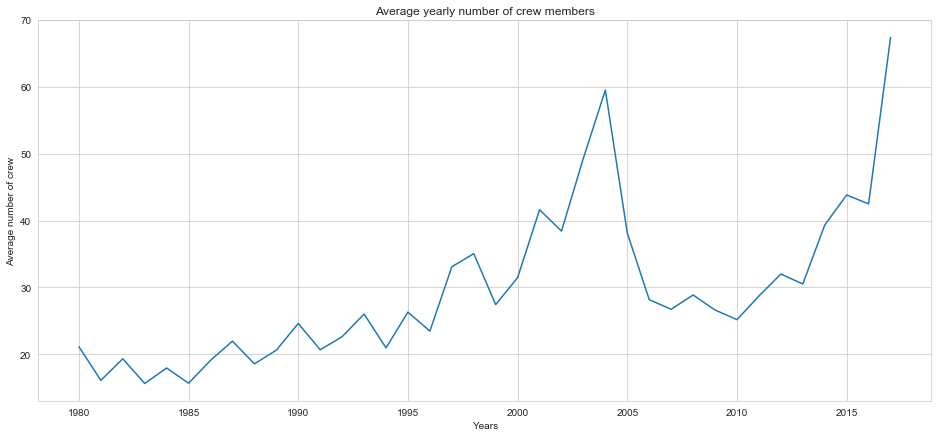

In [30]:
df_temp = df.groupby(by='year')['count_crew'].mean()

plt.figure(figsize=(16,7))
plt.plot(df_temp.index, df_temp.values, '-')
plt.xlabel('Years')
plt.ylabel('Average number of crew')
plt.title('Average yearly number of crew members')